#import libraries

In [ ]:
!pip install -q transformers[torch]
!pip install -q python-bidi
!pip install -q hazm

In [ ]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import re
from hazm import Normalizer, word_tokenize, stopwords_list
import os
from wordcloud import WordCloud, STOPWORDS
from bidi import algorithm as bidi
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import string
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import torch
from tqdm import tqdm
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True


# Exploratory Data Analysis (EDA) on Movie Dataset

The Exploratory Data Analysis (EDA) process is a crucial step to understand the characteristics and patterns present in a dataset. In this notebook, we'll perform EDA on a movie dataset to gain insights into various aspects such as genre distribution, release years, runtime, and ratings for both Persian and English language movies.

During the EDA process, we'll explore the dataset by:

1. Analyzing the genre distribution for Persian and English movies to identify popular genres.
2. Examining the release year trends for Persian and English movies to understand the distribution over time.
3. Investigating the runtime statistics for Persian and English movies to study the typical movie lengths.
4. Evaluating the rating distributions for Persian and English movies to gauge audience preferences.
...

The EDA process is iterative, and additional analyses may be required based on the insights gained from the initial exploration. The goal is to develop a comprehensive understanding of the dataset for both Persian and English language movies before proceeding with further analysis or modeling.

Feel free to explore the dataset creatively and provide any additional insights or visualizations that you find interesting or valuable. We encourage you to bring your unique perspective and creativity to enhance the EDA process.

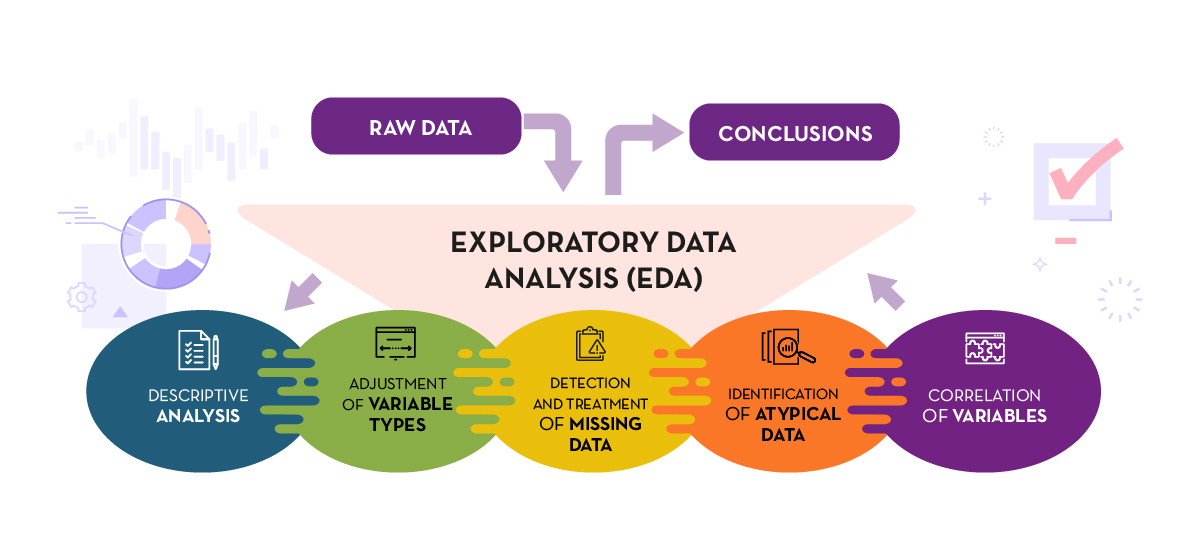

###1. **Data Preprocessing**:
   - Load the dataset
   - Check for missing values and handle them appropriately
   - Convert data types if necessary (e.g., string to datetime for release dates)
   - Create a new column called "preprocessed summary" where you perform the following steps and save the preprocessed summary in that column and later use it for the finetuning and analysis:
  *   Tokenize words
  *   Normalize text
  *   Remove punctuations
  *   Remove stopwords
  *   Removing HTML tags or markup
  *   Lemmatizing or stemming words
  *   Removing numbers or special characters
  *   Removing or replacing non-ASCII characters



In [ ]:
# TODO: Load Dataset
file_path = 'persianmovies.csv'
df = pd.read_csv(file_path)

print(df.head())

print(df.isnull().sum())
def fill_missing_values(df):
    for column in df.columns:
        if df[column].dtype == np.number:
            df[column].fillna(df[column].mean(), inplace=True)
        else:
            df[column].fillna('نامشخص', inplace=True)
    return df

df = fill_missing_values(df)

print(df.isnull().sum())

df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce').dt.year
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')

print(df.dtypes)

                                                Link            EN_title  \
0  https://www.imvbox.com/watch-persian-movie-ira...   Local Anaesthetic   
1  https://www.imvbox.com/watch-persian-movie-ira...         Disturbance   
2  https://www.imvbox.com/watch-persian-movie-ira...           Highlight   
3  https://www.imvbox.com/watch-persian-movie-ira...               Gilda   
4  https://www.imvbox.com/watch-persian-movie-ira...  Atmosphere Station   

     PENGLISH_title   PERSIAN_title  \
0  Bi Hessie Mozeie    بی‌حسی موضعی   
1         Ashoftegi        آشفته گی   
2           Haylayt         هایلایت   
3            Geelda           گیلدا   
4  Istgahe Atmosfer  ایستگاه اتمسفر   

                                           Content_1  \
0  جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...   
1  «آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...   
2  یک تصادف اتومبیل آدم‌هایی را در تقابل با هم قر...   
3  گیلدا ماجرای زنی به نام «گیلدا» را روایت می کن...   
4  این فیلم روایت گر داستان 

<ipython-input-8-85bd8728d6e7>:14: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


In [ ]:
import spacy
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

class English_Preprocessor:
    """
    A class for preprocessing text data.

    Attributes:
        stopwords (set): A set of stopwords to be removed from the text.
        nlp (spacy.lang.en.English): A SpaCy English language model for text normalization.

    Methods:
        preprocess(text): Performs preprocessing steps on the given text.
        normalize(text): Normalizes the given text by converting it to lowercase and lemmatizing the words.
        remove_punctuations(text): Removes punctuation from the given text.
        word_tokenize(text): Tokenizes the given text into individual words.
        remove_stopwords(words): Removes stopwords from the given list of words.
    """

    def __init__(self):
        """
        Initializes the Preprocessor object.
        """
        self.stopwords = set(stopwords.words('english'))
        self.nlp = spacy.load('en_core_web_sm')

    def preprocess(self, text):
        """
        Preprocesses the given text by performing normalization, punctuation removal, word tokenization, and stopword removal.

        Args:
            text (str): The input text to be preprocessed.

        Returns:
            str: The preprocessed text.
        """
        text = self.normalize(text)
        text = self.remove_punctuations(text)
        words = self.word_tokenize(text)
        words = self.remove_stopwords(words)
        return ' '.join(words)

    def normalize(self, text):
        """
        Normalizes the given text by converting it to lowercase and lemmatizing the words.

        Args:
            text (str): The input text to be normalized.

        Returns:
            str: The normalized text.
        """
        doc = self.nlp(text.lower())
        return ' '.join([token.lemma_ for token in doc])

    def remove_punctuations(self, text):
        """
        Removes punctuation from the given text.

        Args:
            text (str): The input text from which punctuation needs to be removed.

        Returns:
            str: The text with punctuation removed.
        """
        return re.sub(r'[^\w\s]', '', text)

    def word_tokenize(self, text):
        """
        Tokenizes the given text into individual words.

        Args:
            text (str): The input text to be tokenized.

        Returns:
            list: A list of tokens (words) in the text.
        """
        return word_tokenize(text)

    def remove_stopwords(self, words):
        """
        Removes stopwords from the given list of words.

        Args:
            words (list): A list of words from which stopwords need to be removed.

        Returns:
            list: A list of words with stopwords removed.
        """
        return [word for word in words if word not in self.stopwords]


In [ ]:
# TODO: Apply the preprocess method of the Preprocessor object to the English Summary column of the DataFrame
# and store the preprocessed text in a new column named 'Preprocessed English'.
# TODO: Display the updated DataFrame with the new 'Preprocessed English' column.
# Initialize the preprocessor
preprocessor = English_Preprocessor()

df['Preprocessed English'] = df['Content_2'].apply(preprocessor.preprocess)

print(df.head())

                                                Link            EN_title  \
0  https://www.imvbox.com/watch-persian-movie-ira...   Local Anaesthetic   
1  https://www.imvbox.com/watch-persian-movie-ira...         Disturbance   
2  https://www.imvbox.com/watch-persian-movie-ira...           Highlight   
3  https://www.imvbox.com/watch-persian-movie-ira...               Gilda   
4  https://www.imvbox.com/watch-persian-movie-ira...  Atmosphere Station   

     PENGLISH_title   PERSIAN_title  \
0  Bi Hessie Mozeie    بی‌حسی موضعی   
1         Ashoftegi        آشفته گی   
2           Haylayt         هایلایت   
3            Geelda           گیلدا   
4  Istgahe Atmosfer  ایستگاه اتمسفر   

                                           Content_1  \
0  جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...   
1  «آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...   
2  یک تصادف اتومبیل آدم‌هایی را در تقابل با هم قر...   
3  گیلدا ماجرای زنی به نام «گیلدا» را روایت می کن...   
4  این فیلم روایت گر داستان 

In [ ]:
from hazm import Normalizer, word_tokenize as hazm_word_tokenize, stopwords_list

normalizer = Normalizer()

persian_stopwords = set(stopwords_list())

def persian_preprocess_text(text):
    """
    Preprocesses the given Persian text by performing normalization, punctuation removal, word tokenization, and stopword removal.

    Args:
        text (str): The input Persian text to be preprocessed.

    Returns:
        str: The preprocessed Persian text.
    """
    text = re.sub(r'[^\w\s]', '', text)

    text = normalizer.normalize(text)

    words = hazm_word_tokenize(text)

    words = [word for word in words if word not in persian_stopwords]

    return ' '.join(words)

df['Preprocessed Persian'] = df['Content_1'].apply(persian_preprocess_text)

print(df.head())

                                                Link            EN_title  \
0  https://www.imvbox.com/watch-persian-movie-ira...   Local Anaesthetic   
1  https://www.imvbox.com/watch-persian-movie-ira...         Disturbance   
2  https://www.imvbox.com/watch-persian-movie-ira...           Highlight   
3  https://www.imvbox.com/watch-persian-movie-ira...               Gilda   
4  https://www.imvbox.com/watch-persian-movie-ira...  Atmosphere Station   

     PENGLISH_title   PERSIAN_title  \
0  Bi Hessie Mozeie    بی‌حسی موضعی   
1         Ashoftegi        آشفته گی   
2           Haylayt         هایلایت   
3            Geelda           گیلدا   
4  Istgahe Atmosfer  ایستگاه اتمسفر   

                                           Content_1  \
0  جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...   
1  «آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...   
2  یک تصادف اتومبیل آدم‌هایی را در تقابل با هم قر...   
3  گیلدا ماجرای زنی به نام «گیلدا» را روایت می کن...   
4  این فیلم روایت گر داستان 

### 2. **Descriptive Statistics**:
   - Calculate summary statistics (mean, median, mode, standard deviation, range) for numerical variables
   - Determine the count and frequency of unique values for categorical variables

In [ ]:
class DescriptiveStats:
    def __init__(self, df):
        self.df = df

    def calculate_summary_stats(self, numerical_cols):
        """
        Calculate summary statistics (mean, median, mode, standard deviation, range) for numerical variables.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (prints the summary statistics for each numerical column)
        """
        for col in numerical_cols:
            if pd.api.types.is_numeric_dtype(self.df[col]):
                mean = self.df[col].mean()
                median = self.df[col].median()
                mode = self.df[col].mode()[0]
                std = self.df[col].std()
                data_range = self.df[col].max() - self.df[col].min()

                print(f"Summary statistics for {col}:")
                print(f"Mean: {mean}")
                print(f"Median: {median}")
                print(f"Mode: {mode}")
                print(f"Standard Deviation: {std}")
                print(f"Range: {data_range}")
                print("\n")
            else:
                print(f"{col} is not a numerical column.\n")

    def count_unique_values(self, categorical_cols):
        """
        Determine the count and frequency of unique values for categorical variables.

        Args:
            categorical_cols (list): A list of column names containing categorical data.

        Returns:
            None (prints the count and frequency of unique values for each categorical column)
        """
        for col in categorical_cols:
            if pd.api.types.is_categorical_dtype(self.df[col]) or pd.api.types.is_object_dtype(self.df[col]):
                unique_values = self.df[col].value_counts()
                total_values = len(self.df[col])

                print(f"Unique values count and frequency for {col}:")
                for value, count in unique_values.items():
                    frequency = count / total_values
                    print(f"Value: {value}, Count: {count}, Frequency: {frequency:.2f}")
                print("\n")
            else:
                print(f"{col} is not a categorical column.\n")

numerical_cols = ['Score', 'Year', 'Time']
categorical_cols = ['Genre']
stats = DescriptiveStats(df)

stats.calculate_summary_stats(numerical_cols)

stats.count_unique_values(categorical_cols)

Summary statistics for Score:
Mean: 6.532776617954071
Median: 6.8
Mode: 8.0
Standard Deviation: 1.562260838809566
Range: 10.0


Summary statistics for Year:
Mean: 2007.2026462395543
Median: 2010.0
Mode: 2017.0
Standard Deviation: 9.331824457005668
Range: 52.0


Summary statistics for Time:
Mean: 86.166783461808
Median: 90.0
Mode: 90.0
Standard Deviation: 19.85452537320634
Range: 171.0


Unique values count and frequency for Genre:
Value: Drama, Count: 752, Frequency: 0.52
Value: Comedy, Count: 267, Frequency: 0.19
Value: Action, Count: 76, Frequency: 0.05
Value: Crime, Count: 67, Frequency: 0.05
Value: Adventure, Count: 48, Frequency: 0.03
Value: Human Interest & Society, Count: 46, Frequency: 0.03
Value: Arts & Literature, Count: 35, Frequency: 0.02
Value: Family, Count: 25, Frequency: 0.02
Value: Culture & Traditions, Count: 24, Frequency: 0.02
Value: War, Count: 21, Frequency: 0.01
Value: History, Count: 18, Frequency: 0.01
Value: Romance, Count: 12, Frequency: 0.01
Value: Architect

###3. **Data Visualization**:
   - Plot histograms or density plots for numerical variables
   - Create bar plots or pie charts for categorical variables
   - Generate scatter plots or correlation matrices to explore relationships

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

class DataVisualization:
    def __init__(self, df):
        self.df = df

    def plot_histograms(self, numerical_cols):
        """
        Plot histograms or density plots for numerical variables.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (displays the plots)
        """
        for col in numerical_cols:
            plt.figure(figsize=(10, 5))
            sns.histplot(self.df[col], kde=True, bins=30)
            plt.title(f'Histogram and Density Plot for {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.show()

    def plot_categorical(self, categorical_cols):
        """
        Create bar plots or pie charts for categorical variables.

        Args:
            categorical_cols (list): A list of column names containing categorical data.

        Returns:
            None (displays the plots)
        """
        for col in categorical_cols:
            plt.figure(figsize=(10, 5))
            sns.countplot(x=self.df[col], order=self.df[col].value_counts().index)
            plt.title(f'Bar Plot for {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=90)
            plt.show()

            plt.figure(figsize=(10, 5))
            self.df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
            plt.title(f'Pie Chart for {col}')
            plt.ylabel('')
            plt.show()

    def plot_relationships(self, numerical_cols):
        """
        Generate scatter plots or correlation matrices to explore relationships between numerical variables.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (displays the plots)
        """
        # Scatter plot matrix
        sns.pairplot(self.df[numerical_cols])
        plt.title('Scatter Plot Matrix')
        plt.show()

        # Correlation matrix
        plt.figure(figsize=(10, 5))
        corr_matrix = self.df[numerical_cols].corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Correlation Matrix')
        plt.show()

numerical_cols = ['Score', 'Year', 'Time']
categorical_cols = ['Genre']
print(df.head())

viz = DataVisualization(df)

viz.plot_histograms(numerical_cols)

viz.plot_categorical(categorical_cols)

viz.plot_relationships(numerical_cols)

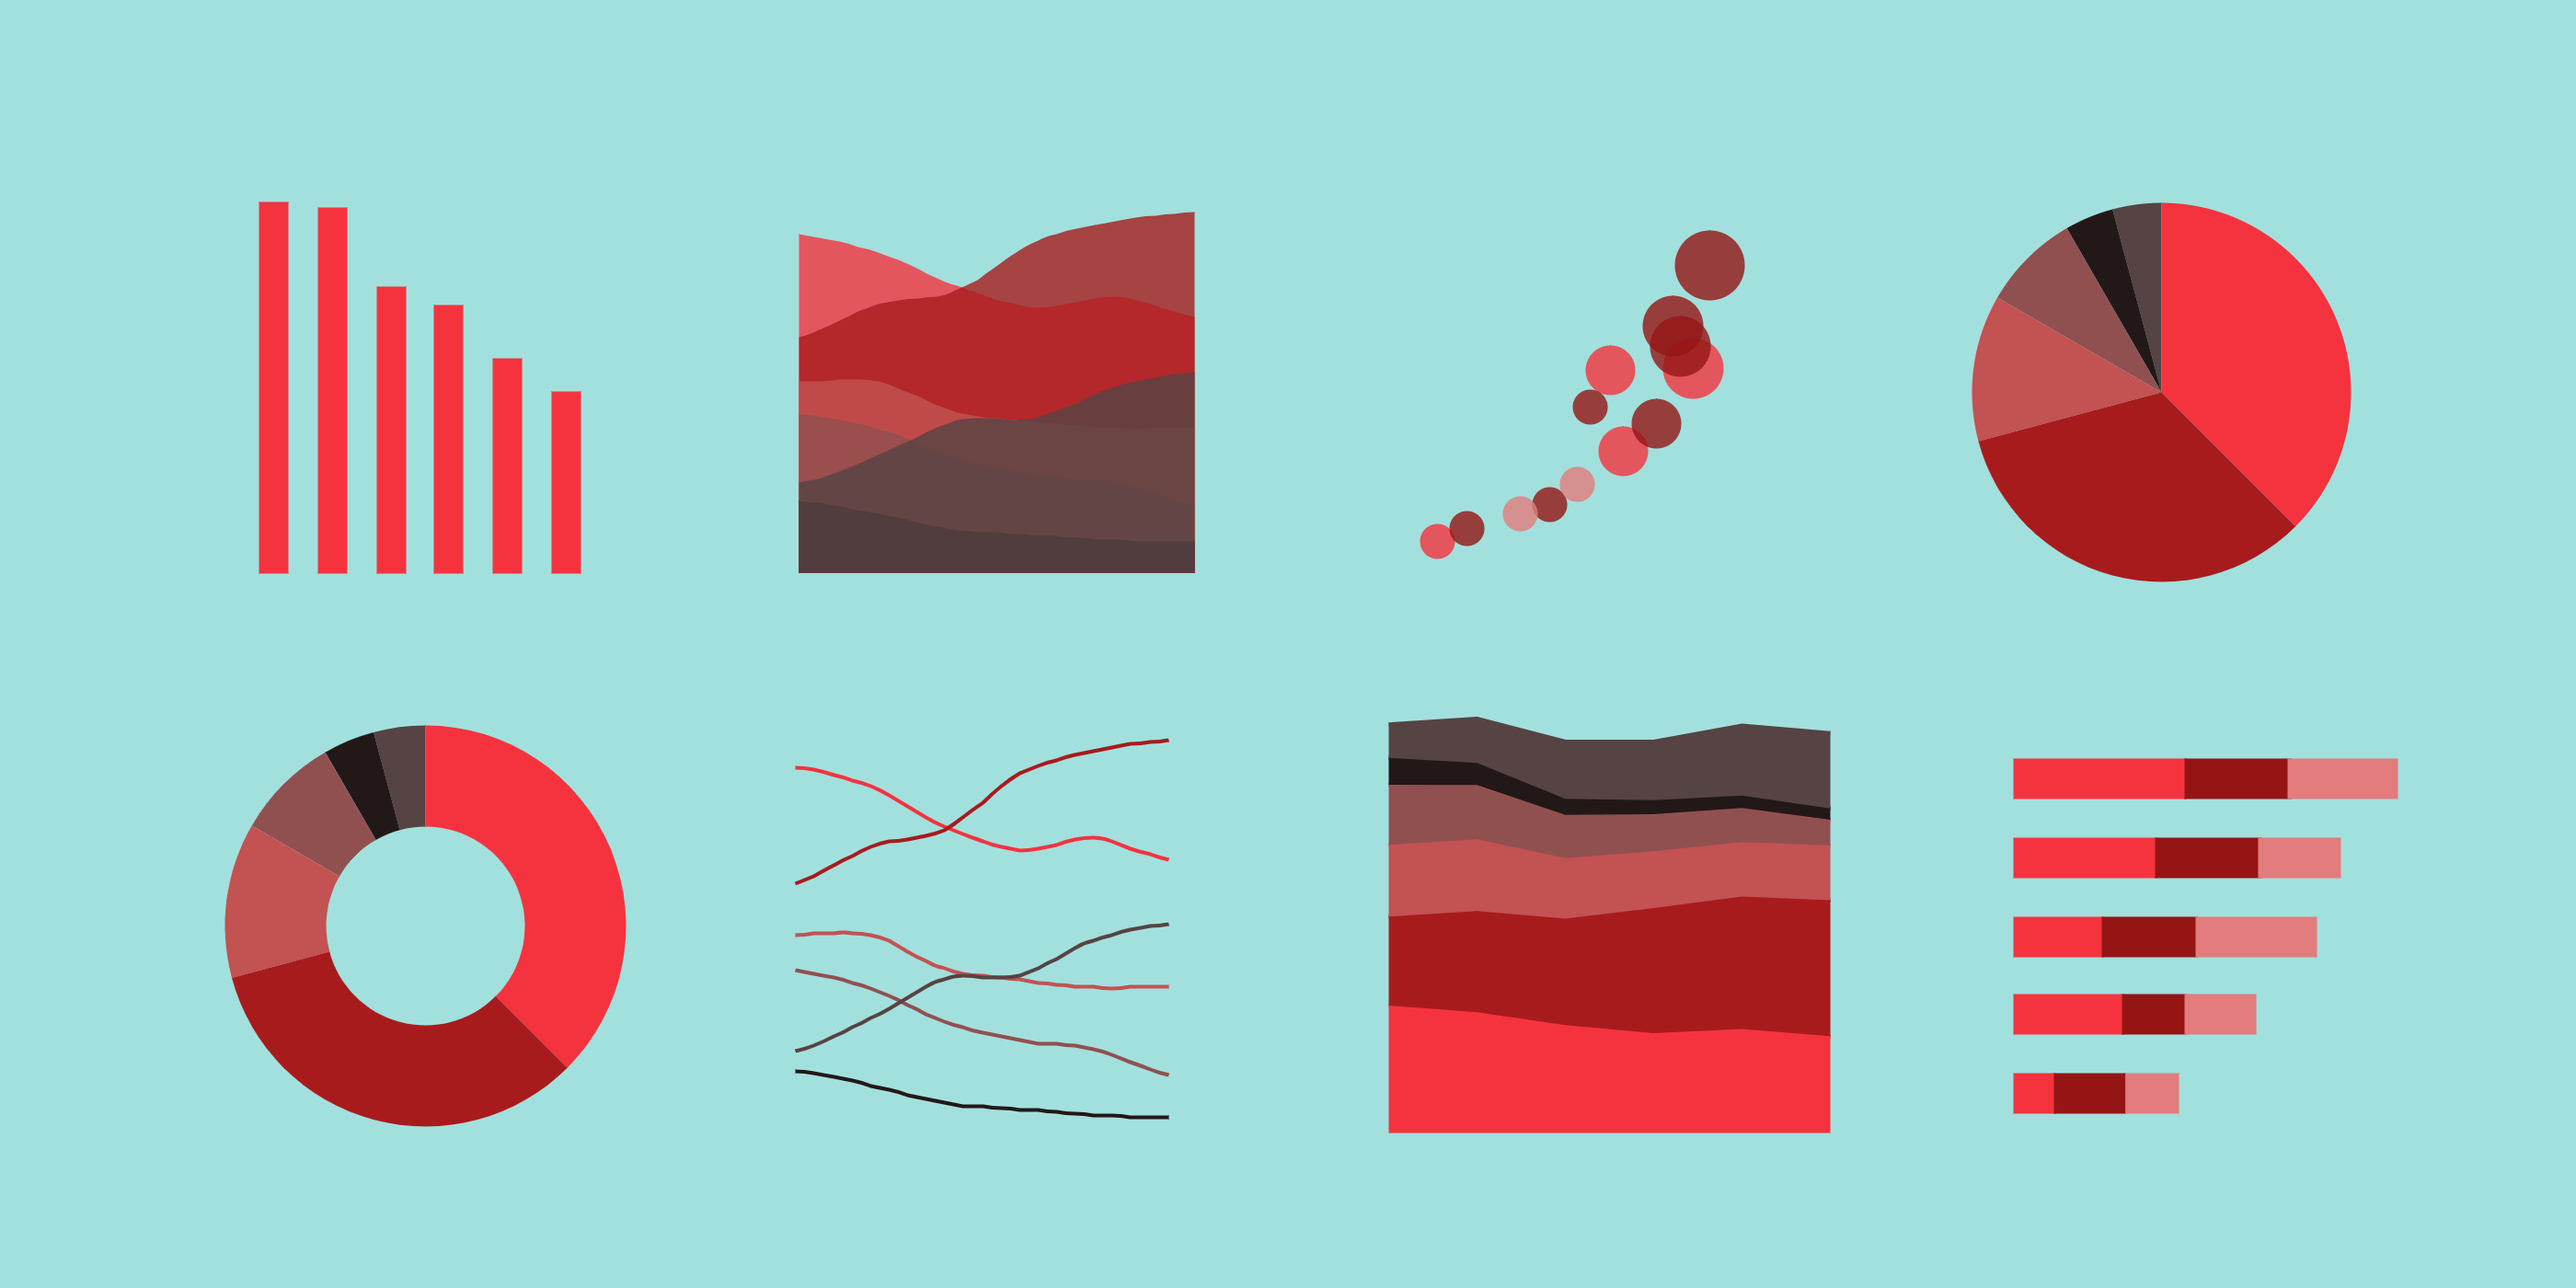

###4. **Genre Analysis**:
   - Create a word cloud or bar plot for genre distribution (you can use bidi library for persian text)
   - Obtain the 10 most frequently occurring words for each genre, based on both the initial summaries and the preprocessed summaries.
   - Analyze the distribution of movies across genres
   - Explore the relationship between genres and other variables

<ipython-input-14-7515ca1c6ace>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")


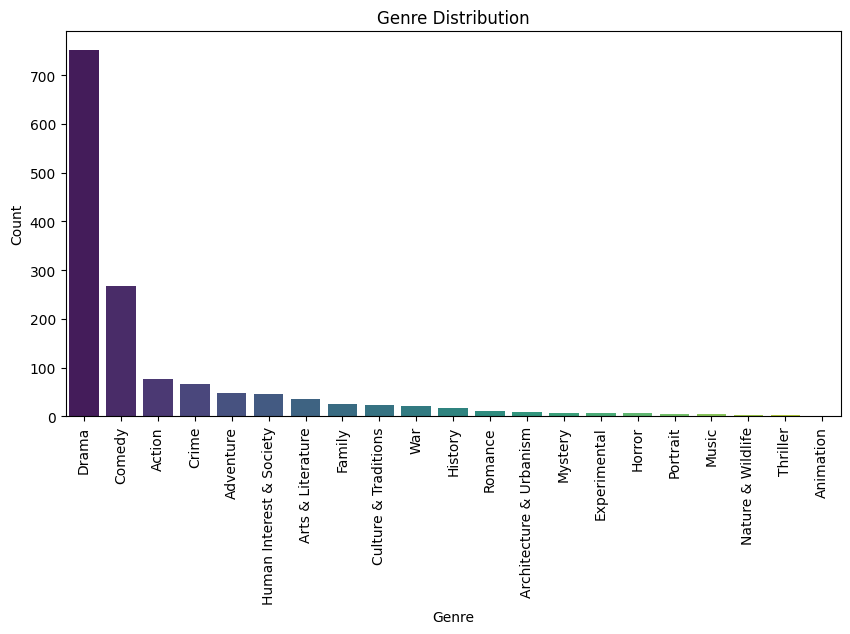

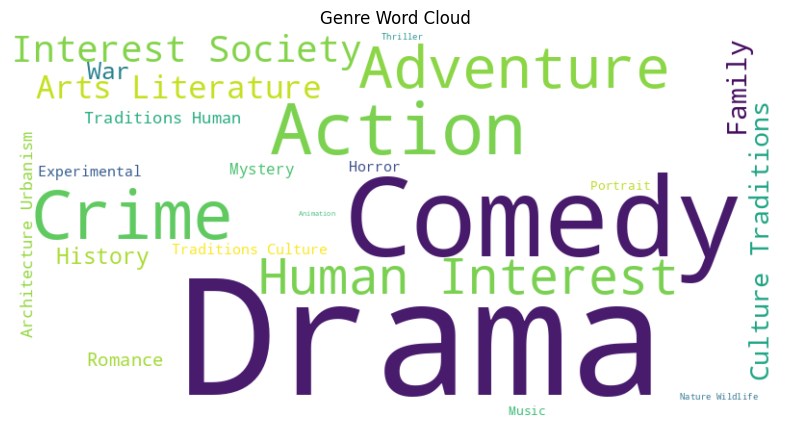

Top 10 words for genre 'Drama':
life: 417
find: 313
young: 280
go: 272
family: 272
one: 266
take: 235
man: 223
get: 223
story: 218


Top 10 words for genre 'Crime':
life: 37
find: 36
get: 33
go: 32
friend: 29
woman: 23
money: 22
young: 22
kill: 22
murder: 21


Top 10 words for genre 'Human Interest & Society':
iran: 34
life: 31
documentary: 31
film: 24
child: 22
one: 19
family: 12
year: 11
iranian: 11
make: 11


Top 10 words for genre 'Comedy':
get: 119
man: 107
go: 95
find: 91
family: 83
story: 82
one: 77
life: 76
young: 72
marry: 72


Top 10 words for genre 'Adventure':
find: 36
life: 25
story: 25
man: 25
family: 23
go: 22
young: 20
get: 20
woman: 19
old: 18


Top 10 words for genre 'Mystery':
payam: 4
siavash: 4
نامشخص: 3
friend: 3
leave: 3
couple: 3
plan: 3
shiva: 3
mahtaj: 3
year: 2


Top 10 words for genre 'War':
war: 20
iran: 15
enemy: 15
force: 12
line: 12
iraq: 11
find: 10
front: 10
iraqi: 9
akbar: 9


Top 10 words for genre 'Action':
find: 31
iran: 31
go: 30
get: 30
take: 28


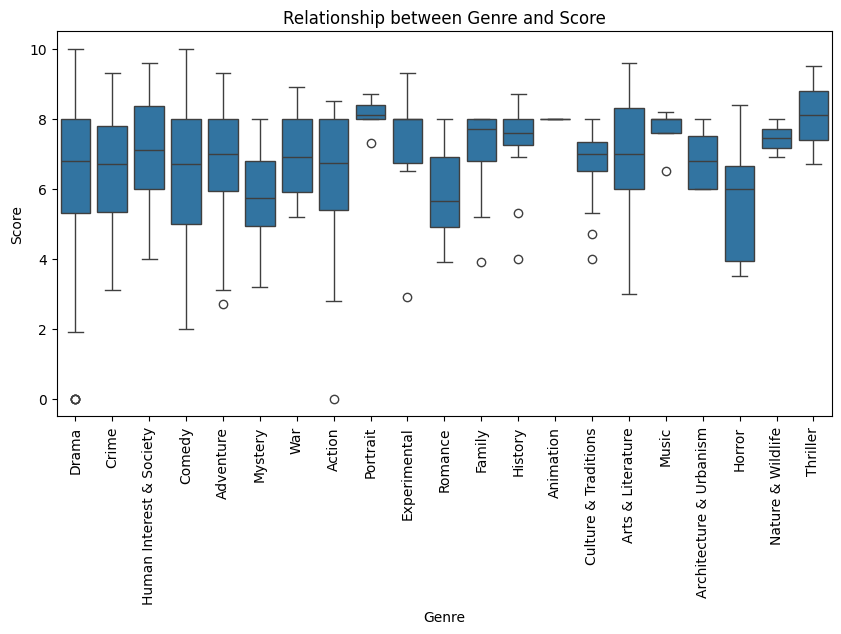

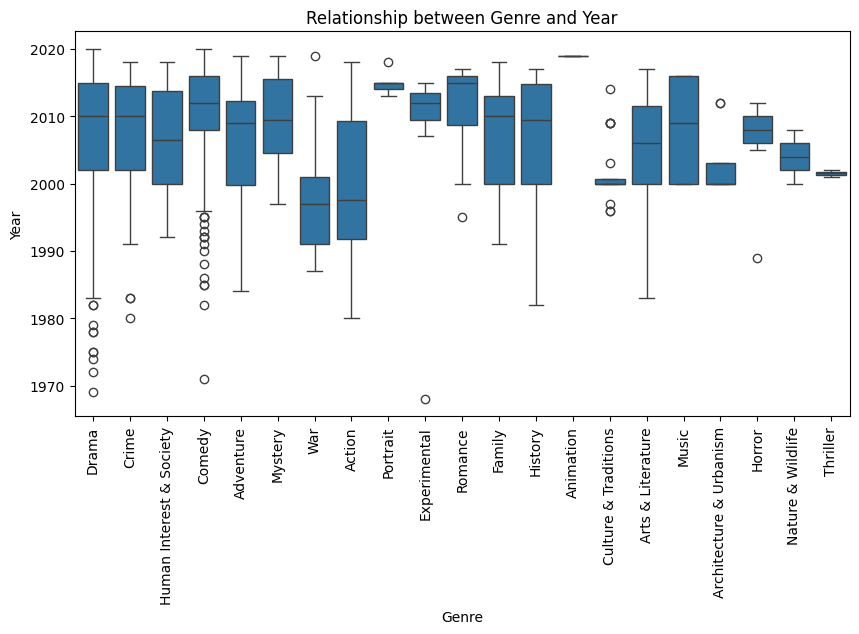

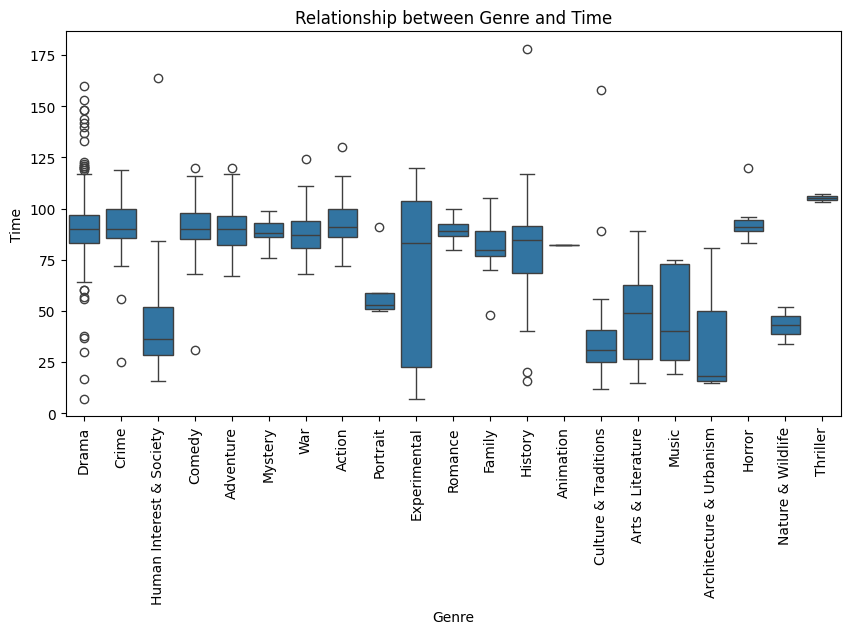

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bidi.algorithm import get_display
import seaborn as sns
from collections import Counter
import nltk
class GenreAnalysis:
    def __init__(self, df):
        self.df = df

    def visualize_genre_distribution(self, column):
        """
        Create a word cloud or bar plot for genre distribution.

        Args:
            column (str): The column name containing the genre information.

        Returns:
            None (displays the plot)
        """
        genre_counts = self.df[column].value_counts()

        # Bar plot for genre distribution
        plt.figure(figsize=(10, 5))
        sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
        plt.title('Genre Distribution')
        plt.xlabel('Genre')
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.show()

        # Word cloud for genre distribution
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(self.df[column]))
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Genre Word Cloud')
        plt.show()

    def frequent_words_by_genre(self, content_column, genre_column):
        """
        Obtain the 10 most frequently occurring words for each genre, based on both the initial summaries and the preprocessed summaries.

        Args:
            content_column (str): The column name containing the text data.
            genre_column (str): The column name containing the genre information.

        Returns:
            None (prints the top 10 most frequent words for each genre)
        """
        genres = self.df[genre_column].unique()
        for genre in genres:
            genre_texts = self.df[self.df[genre_column] == genre][content_column].str.cat(sep=' ')
            words = nltk.word_tokenize(genre_texts)
            word_freq = Counter(words)
            common_words = word_freq.most_common(10)
            print(f"Top 10 words for genre '{genre}':")
            for word, freq in common_words:
                print(f"{word}: {freq}")
            print("\n")

    def analyze_genre_distribution(self, genre_column):
        """
        Analyze the distribution of movies across genres.

        Args:
            genre_column (str): The column name containing the genre information.

        Returns:
            None (prints the analysis of genre distribution)
        """
        genre_counts = self.df[genre_column].value_counts()
        most_popular_genre = genre_counts.idxmax()
        least_popular_genre = genre_counts.idxmin()
        print(f"Most popular genre: {most_popular_genre} with {genre_counts.max()} movies")
        print(f"Least popular genre: {least_popular_genre} with {genre_counts.min()} movies")
        print("\nGenre distribution:")
        print(genre_counts)

    def explore_genre_relationships(self, genre_column, other_columns):
        """
        Explore the relationship between genres and other variables.

        Args:
            genre_column (str): The column name containing the genre information.
            other_columns (list): A list of column names to explore relationships with.

        Returns:
            None (displays plots or prints analysis)
        """
        for col in other_columns:
            plt.figure(figsize=(10, 5))
            if pd.api.types.is_numeric_dtype(self.df[col]):
                sns.boxplot(x=self.df[genre_column], y=self.df[col])
                plt.title(f'Relationship between {genre_column} and {col}')
                plt.xlabel(genre_column)
                plt.ylabel(col)
                plt.xticks(rotation=90)
                plt.show()
            elif pd.api.types.is_categorical_dtype(self.df[col]) or pd.api.types.is_object_dtype(self.df[col]):
                sns.countplot(x=self.df[genre_column], hue=self.df[col])
                plt.title(f'Relationship between {genre_column} and {col}')
                plt.xlabel(genre_column)
                plt.ylabel('Count')
                plt.xticks(rotation=90)
                plt.show()
            else:
                print(f"Cannot plot {col} because it is neither numerical nor categorical.")

genre_column = 'Genre'
content_column = 'Preprocessed English'
other_columns = ['Score', 'Year', 'Time']
genre_analysis = GenreAnalysis(df)

genre_analysis.visualize_genre_distribution(genre_column)

genre_analysis.frequent_words_by_genre(content_column, genre_column)

genre_analysis.analyze_genre_distribution(genre_column)

genre_analysis.explore_genre_relationships(genre_column, other_columns)

In one paragraph, briefly explain what you found interesting in your analysis and whether this analysis prompted you to take any further steps; if so, explain those additional steps.



ژانر دراما بسیار پر تولید تر بوده نسبت به بقیه ژانر ها. همچنین این ژانر میانگین امیتاز به نسبت بالایی دارد که نشان دهنده جذب بالای سرمایه در این بخش است. بیشترین کلمات این دسته شامل زندگی و خانواده و ... هستند که نشان ازاین میدهد که چه زیر مجموعه ای در این ژانر محبوب تر است.

###5. **Time-based Analysis**:
   - Plot line or bar charts for movie releases over time
   - Investigate trends or patterns in movie releases
   - Analyze the relationship between release year and other variables

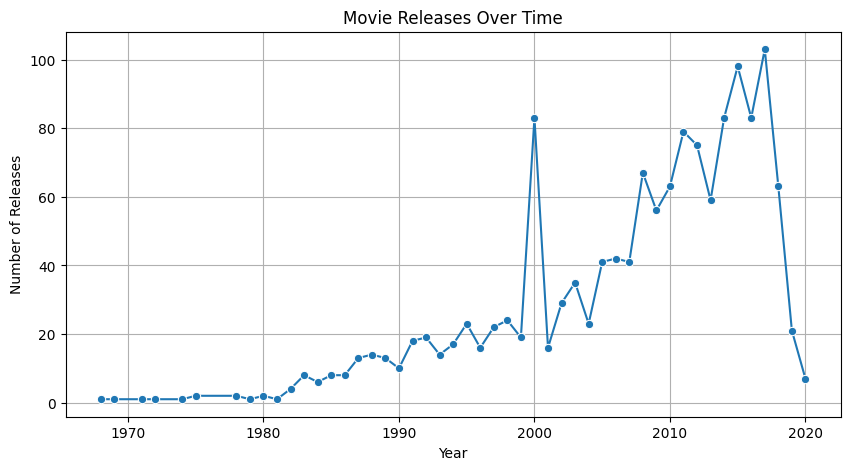

<ipython-input-15-33e4df85a71f>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_data.index, y=time_data.values, palette='viridis')


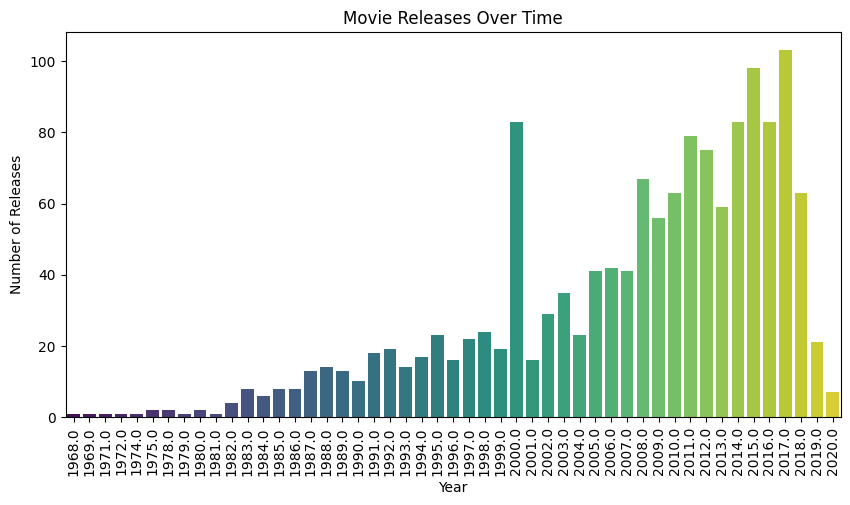

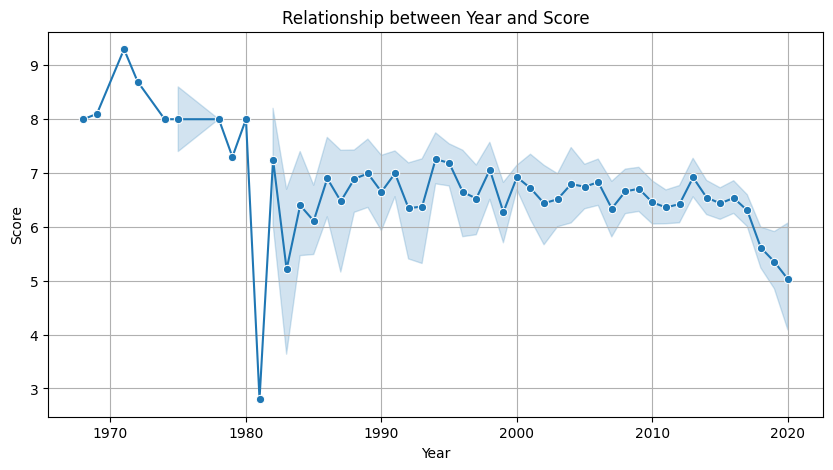

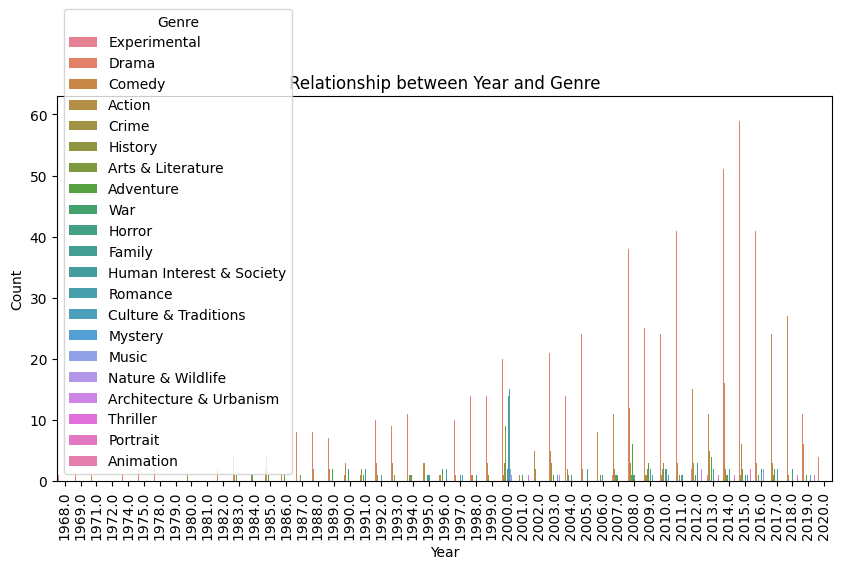

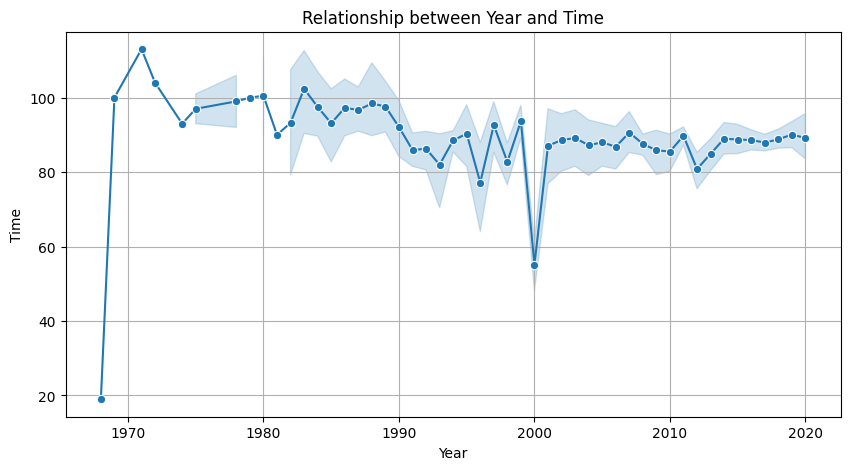

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

class TimeAnalysis:
    def __init__(self, df):
        self.df = df

    def plot_movie_releases(self, time_column):
        """
        Plot line or bar charts for movie releases over time.

        Args:
            time_column (str): The column name containing the time or release year information.

        Returns:
            None (displays the plot)
        """
        # Check if the time_column contains continuous time data (e.g., years)
        time_data = self.df[time_column].value_counts().sort_index()

        # Create a line chart for movie releases over time
        plt.figure(figsize=(10, 5))
        sns.lineplot(x=time_data.index, y=time_data.values, marker='o')
        plt.title('Movie Releases Over Time')
        plt.xlabel('Year')
        plt.ylabel('Number of Releases')
        plt.grid(True)
        plt.show()

        # Create a bar chart for movie releases over time
        plt.figure(figsize=(10, 5))
        sns.barplot(x=time_data.index, y=time_data.values, palette='viridis')
        plt.title('Movie Releases Over Time')
        plt.xlabel('Year')
        plt.ylabel('Number of Releases')
        plt.xticks(rotation=90)
        plt.show()

    def explore_time_relationships(self, time_column, other_columns):
        """
        Analyze the relationship between release time and other variables.

        Args:
            time_column (str): The column name containing the time or release year information.
            other_columns (list): A list of column names to explore relationships with.

        Returns:
            None (displays plots or prints analysis)
        """
        for col in other_columns:
            plt.figure(figsize=(10, 5))
            if pd.api.types.is_numeric_dtype(self.df[col]):
                sns.lineplot(x=self.df[time_column], y=self.df[col], marker='o')
                plt.title(f'Relationship between {time_column} and {col}')
                plt.xlabel(time_column)
                plt.ylabel(col)
                plt.grid(True)
                plt.show()
            elif pd.api.types.is_categorical_dtype(self.df[col]) or pd.api.types.is_object_dtype(self.df[col]):
                sns.countplot(x=self.df[time_column], hue=self.df[col])
                plt.title(f'Relationship between {time_column} and {col}')
                plt.xlabel(time_column)
                plt.ylabel('Count')
                plt.xticks(rotation=90)
                plt.show()
            else:
                print(f"Cannot plot {col} because it is neither numerical nor categorical.")

time_column = 'Year'
other_columns = ['Score', 'Genre', 'Time']

time_analysis = TimeAnalysis(df)

time_analysis.plot_movie_releases(time_column)

time_analysis.explore_time_relationships(time_column, other_columns)

In one paragraph, briefly explain what you found interesting in your analysis.



در بیشتر سال ها شاهد رشد ساخت فیلم بوده ایم. در سال 2000 یک جهش بزرگ از نظر تعداد فیلم ساخته شده به وجود آمده است. در سال های 2019 و 2020 یک سقوط واضح از جهت تعداد فیلم های ساخته شده را داریم که میتوان دلیل آن را ویروس کرونا و قرنطینه دانست. همچنین میتوان دید که تعداد فیلم های ژانر دراما در طول این سال ها ، هر سال فاصله بیشتری از بقیه ژانر ها گرفته است.

###6. **Rating Analysis**:
   - Visualize the distribution of ratings
   - Obtain the 10 most frequently occurring words for each Rating, based on both the initial summaries and the preprocessed summaries.
   - Explore the relationship between ratings and other variables


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


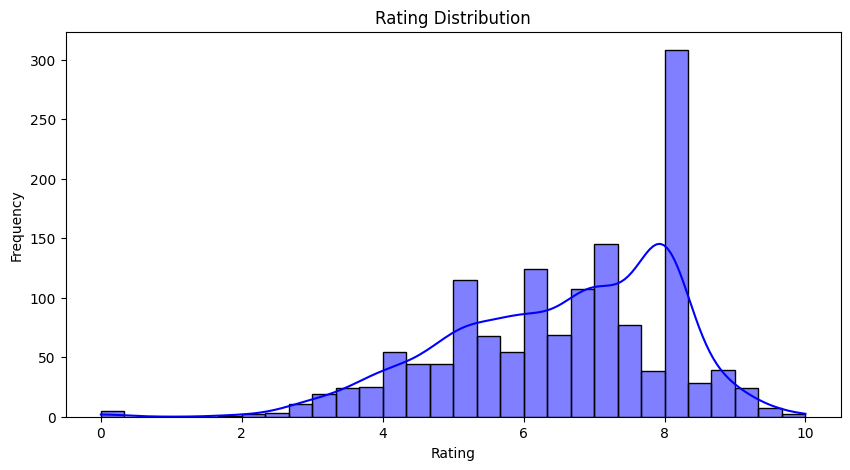

Top 10 words for rating '4.8':
man: 11
story: 11
find: 10
amir: 10
go: 9
love: 7
house: 6
young: 6
wife: 6
take: 6


Top 10 words for rating '3.8':
father: 12
life: 7
young: 5
man: 5
film: 4
two: 4
come: 3
daughter: 3
family: 3
stranger: 3


Top 10 words for rating '4.4':
bijan: 19
try: 9
father: 8
zohreh: 8
love: 7
nilofar: 7
ghahraman: 7
amir: 7
make: 6
wife: 6


Top 10 words for rating '5.6':
year: 14
find: 14
life: 13
get: 11
two: 11
iran: 11
one: 11
man: 10
old: 10
abdol: 10


Top 10 words for rating '5.2':
father: 15
daughter: 13
girl: 13
family: 13
day: 11
become: 11
get: 10
friend: 10
one: 9
return: 9


Top 10 words for rating '3.1':
get: 9
girl: 7
mitra: 7
money: 6
fox: 5
one: 5
woman: 5
film: 5
nazanin: 5
roya: 5


Top 10 words for rating '5.5':
life: 13
story: 8
reza: 7
old: 5
problem: 5
go: 5
force: 4
man: 4
day: 4
film: 4


Top 10 words for rating '4.5':
family: 14
one: 12
reza: 10
find: 9
live: 8
mashreghi: 8
woman: 7
life: 7
I: 7
get: 7


Top 10 words for rating '4.1':
e

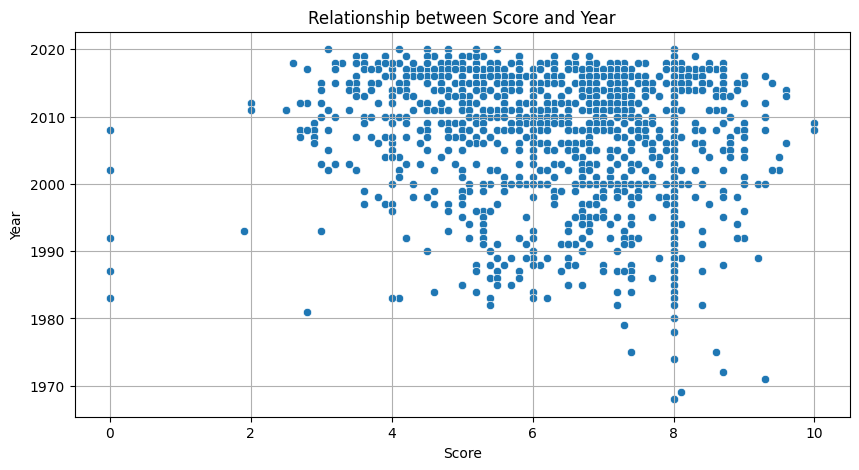

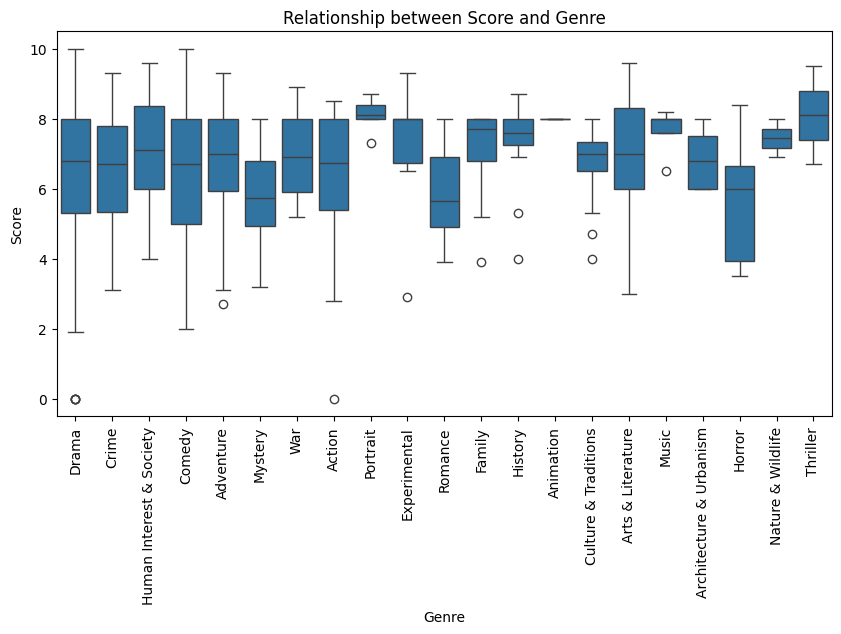

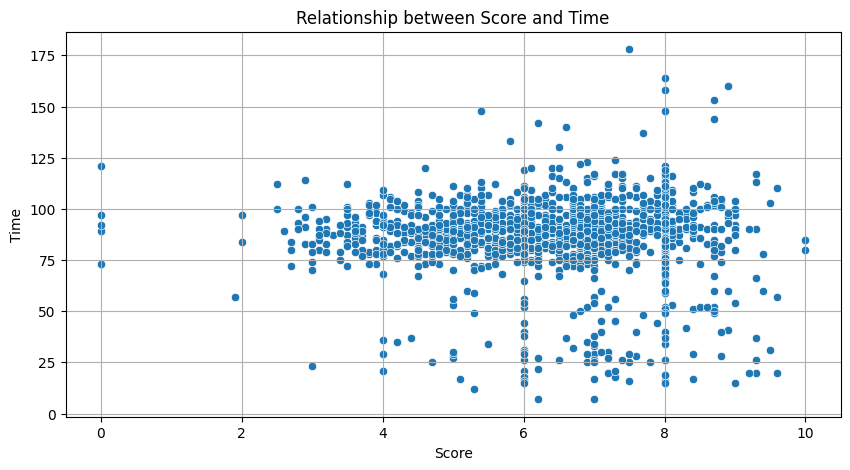

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
nltk.download('punkt')

class RatingAnalysis:
    def __init__(self, df):
        self.df = df

    def visualize_rating_distribution(self, rating_column):
        """
        Visualize the distribution of ratings.

        Args:
            rating_column (str): The column name containing the rating information.

        Returns:
            None (displays the plot)
        """
        plt.figure(figsize=(10, 5))
        sns.histplot(self.df[rating_column], kde=True, bins=30, color='blue')
        plt.title('Rating Distribution')
        plt.xlabel('Rating')
        plt.ylabel('Frequency')
        plt.show()

    def frequent_words_by_rating(self, content_column, rating_column, n=10):
        """
        Obtain the 10 most frequently occurring words for each rating, based on both the initial summaries and the preprocessed summaries.

        Args:
            content_column (str): The column name containing the text data.
            rating_column (str): The column name containing the rating information.
            n (int): The number of most frequent words to obtain (default is 10).

        Returns:
            None (prints the top n frequent words for each rating)
        """
        ratings = self.df[rating_column].unique()
        for rating in ratings:
            rating_texts = self.df[self.df[rating_column] == rating][content_column].str.cat(sep=' ')
            words = nltk.word_tokenize(rating_texts)
            word_freq = Counter(words)
            common_words = word_freq.most_common(n)
            print(f"Top {n} words for rating '{rating}':")
            for word, freq in common_words:
                print(f"{word}: {freq}")
            print("\n")

    def explore_rating_relationships(self, rating_column, other_columns):
        """
        Explore the relationship between ratings and other variables.

        Args:
            rating_column (str): The column name containing the rating information.
            other_columns (list): A list of column names to explore relationships with.

        Returns:
            None (displays plots or prints analysis)
        """
        for col in other_columns:
            plt.figure(figsize=(10, 5))
            if pd.api.types.is_numeric_dtype(self.df[col]):
                sns.scatterplot(x=self.df[rating_column], y=self.df[col])
                plt.title(f'Relationship between {rating_column} and {col}')
                plt.xlabel(rating_column)
                plt.ylabel(col)
                plt.grid(True)
                plt.show()
            elif pd.api.types.is_categorical_dtype(self.df[col]) or pd.api.types.is_object_dtype(self.df[col]):
                sns.boxplot(x=self.df[col], y=self.df[rating_column])
                plt.title(f'Relationship between {rating_column} and {col}')
                plt.xlabel(col)
                plt.ylabel(rating_column)
                plt.xticks(rotation=90)
                plt.show()
            else:
                print(f"Cannot plot {col} because it is neither numerical nor categorical.")

rating_column = 'Score'
content_column = 'Preprocessed English'
other_columns = ['Year', 'Genre', 'Time']

rating_analysis = RatingAnalysis(df)

rating_analysis.visualize_rating_distribution(rating_column)

rating_analysis.frequent_words_by_rating(content_column, rating_column)

rating_analysis.explore_rating_relationships(rating_column, other_columns)

In one paragraph, briefly explain what you found interesting in your analysis.


تعداد فیلم ها با امتیاز بین6 و 8 بسیار قابل توجه و پرتعداد است. این میتواند نشان از آن بدهد که فیلم های برتر سینمای ایران برای این دیتاست انتخاب شده اند. همچنین میتوانیم ببینیم که با گذر زمان در سال های بعد از 2000 امتیاز فیلم ها رشد خوبی کرده است. رابطه زیادی بین امتیاز و مدت زمان فیلم وجود ندارد و میتوان چشمی گفت تقریبا مستقل ز هم هستند.

###7. **Correlation and Multivariate Analysis**:
   - Calculate correlation coefficients between numerical variables
   - Use scatter plot matrices or pair plots for multivariate visualization
   - Employ dimensionality reduction techniques (e.g., PCA) for better visualization

Correlation Matrix:
          Score      Year      Time
Score  1.000000 -0.124057 -0.020171
Year  -0.124057  1.000000  0.015967
Time  -0.020171  0.015967  1.000000


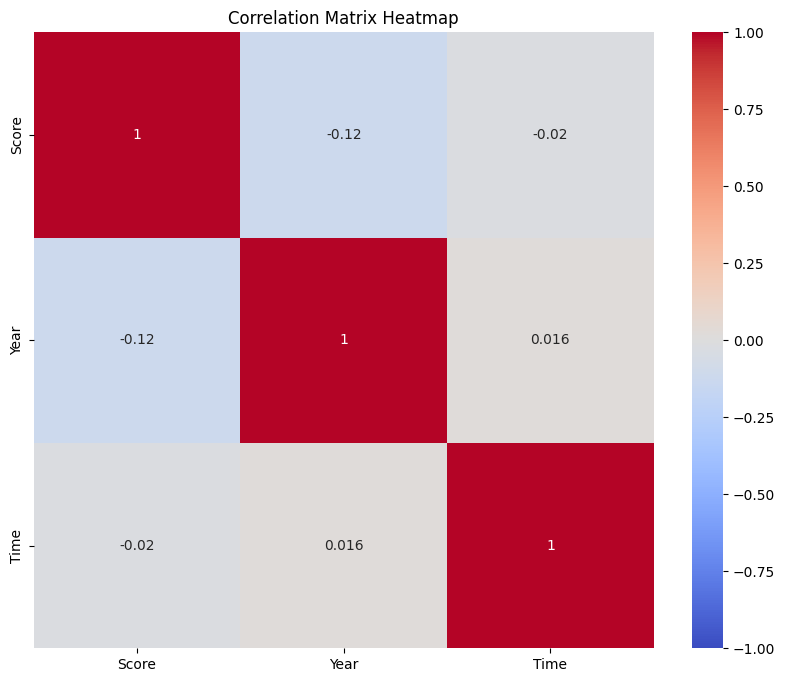

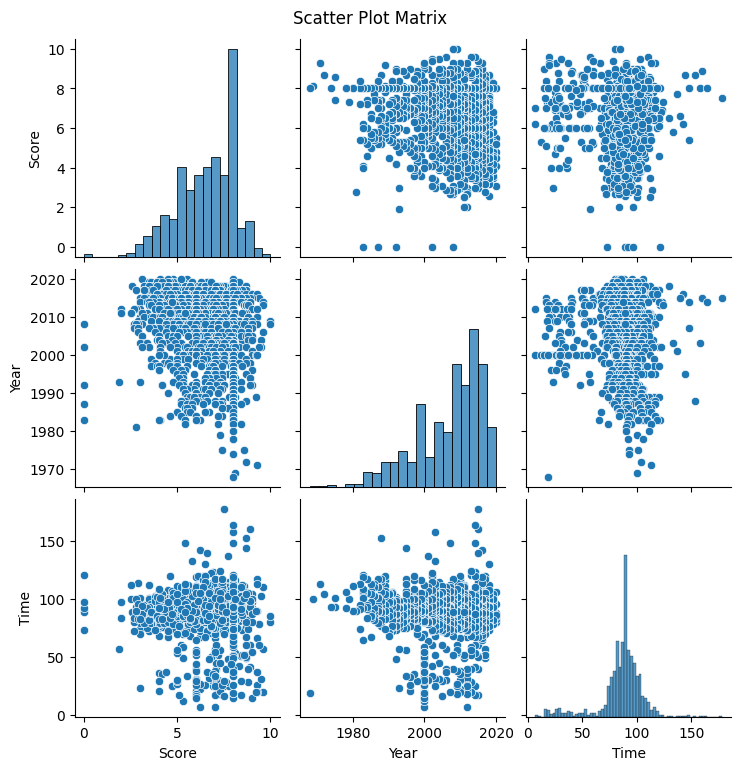

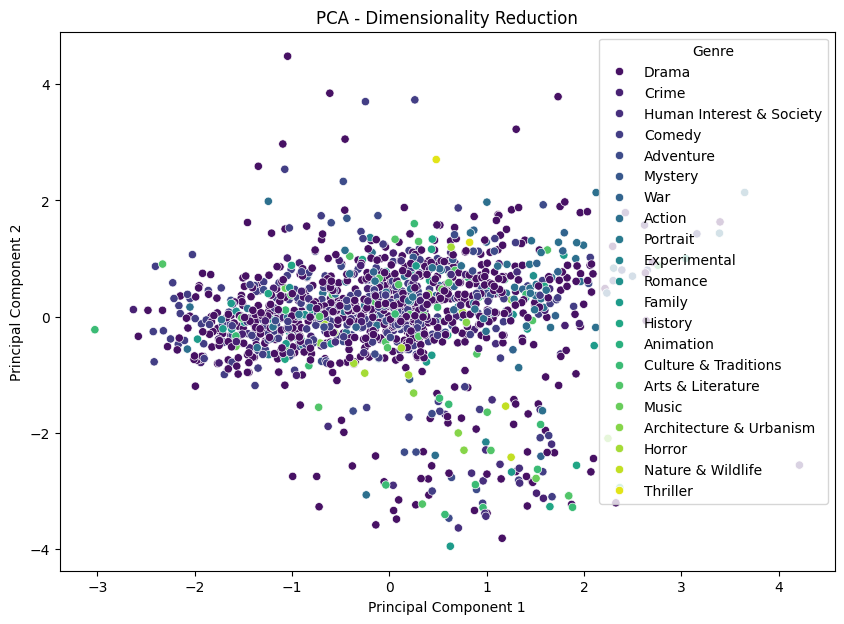

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

class MultivariateAnalysis:
    def __init__(self, df):
        self.df = df

    def calculate_correlations(self, numerical_cols):
        """
        Calculate correlation coefficients between numerical variables.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (prints the correlation matrix)
        """
        correlation_matrix = self.df[numerical_cols].corr()
        print("Correlation Matrix:")
        print(correlation_matrix)

        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Correlation Matrix Heatmap')
        plt.show()

    def visualize_multivariate(self, numerical_cols):
        """
        Use scatter plot matrices or pair plots for multivariate visualization.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (displays the multivariate plot)
        """
        pairplot = sns.pairplot(self.df[numerical_cols])
        plt.suptitle('Scatter Plot Matrix', y=1.02)
        plt.show()

    def dimensionality_reduction(self, numerical_cols, target_column=None):
        """
        Employ dimensionality reduction techniques (e.g., PCA) for better visualization.

        Args:
            numerical_cols (list): A list of column names containing numerical data.
            target_column (str, optional): The column name containing the target variable (if applicable).

        Returns:
            None (displays the dimensionality-reduced plot)
        """
        # Ensure there are no missing values in the numerical columns
        data = self.df[numerical_cols].dropna()

        # Standardize the numerical data
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(data)

        # Apply PCA
        pca = PCA(n_components=2)
        principal_components = pca.fit_transform(scaled_data)

        pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
        if target_column:
            pca_df[target_column] = self.df[target_column].dropna().reset_index(drop=True)

        plt.figure(figsize=(10, 7))
        if target_column:
            sns.scatterplot(x='PC1', y='PC2', hue=target_column, data=pca_df, palette='viridis')
        else:
            sns.scatterplot(x='PC1', y='PC2', data=pca_df, palette='viridis')
        plt.title('PCA - Dimensionality Reduction')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.show()

numerical_cols = ['Score', 'Year', 'Time']
target_column = 'Genre'  # This is a suggestion; feel free to try other targets as well.

multivariate_analysis = MultivariateAnalysis(df)

multivariate_analysis.calculate_correlations(numerical_cols)

multivariate_analysis.visualize_multivariate(numerical_cols)

multivariate_analysis.dimensionality_reduction(numerical_cols, target_column)

In one paragraph, briefly explain what you found interesting in your analysis.


همانطور که انتظار میرفت، میان امتیاز  فیلم و مدت زمان فیلم رابطه جدی وجود ندارد. همچنین میان سال ساخت و مدت زمان فیلم نیز رابطه عمیقی وجود ندارد. اما میان سال ساخت و امتیاز فیلم رابطه بهتر و جدی تری وجود دارد.

###8. **Outlier Detection**:
   - Identify and investigate potential outliers
   - Determine if outliers are genuine or result from data issues

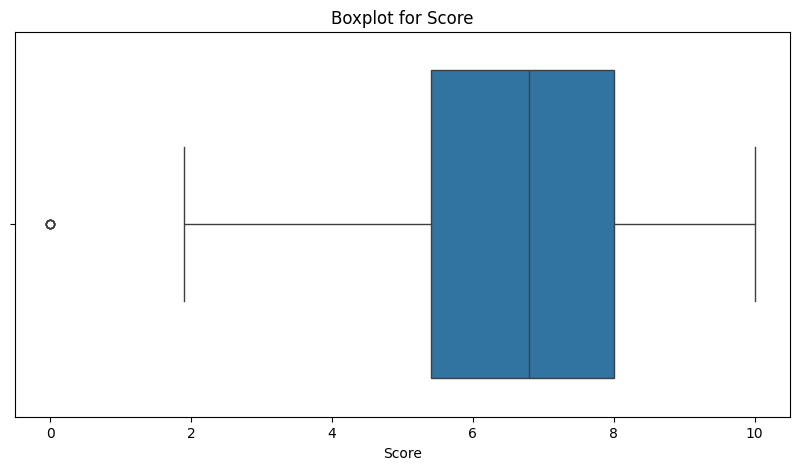

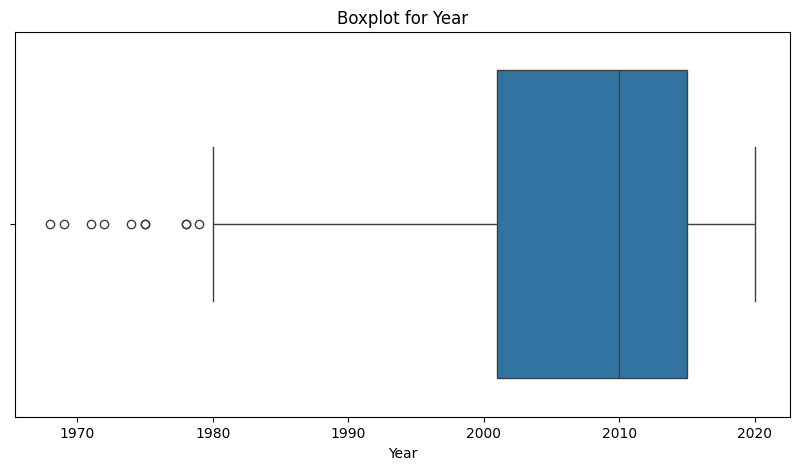

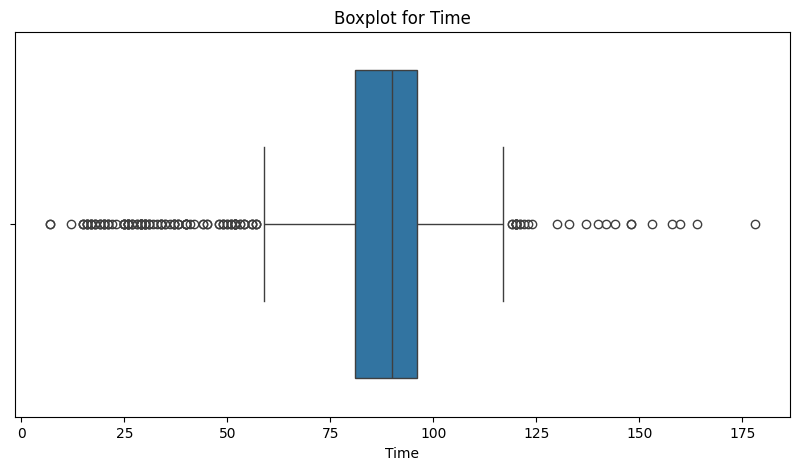

Investigating outliers for Score:
Found 5 potential outliers in Score:
      Score
93      0.0
177     0.0
831     0.0
1055    0.0
1306    0.0


Investigating outliers for Year:
Found 10 potential outliers in Year:
        Year
1424  1979.0
1425  1978.0
1426  1978.0
1427  1975.0
1428  1975.0


Investigating outliers for Time:
Found 144 potential outliers in Time:
      Time
93   121.0
95   130.0
147  120.0
157  148.0
168  120.0




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class OutlierDetection:
    def __init__(self, df):
        self.df = df

    def identify_outliers(self, numerical_cols):
        """
        Identify and visualize potential outliers for numerical variables.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (displays the plots for identifying outliers)
        """
        for col in numerical_cols:
            plt.figure(figsize=(10, 5))
            sns.boxplot(x=self.df[col])
            plt.title(f'Boxplot for {col}')
            plt.xlabel(col)
            plt.show()

    def investigate_outliers(self, numerical_cols):
        """
        Investigate potential outliers and determine if they are genuine or result from data issues.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (prints the analysis of potential outliers)
        """
        for col in numerical_cols:
            print(f"Investigating outliers for {col}:")

            # Calculate the IQR
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1

            # Define outliers using IQR method
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = self.df[(self.df[col] < lower_bound) | (self.df[col] > upper_bound)]

            if not outliers.empty:
                print(f"Found {len(outliers)} potential outliers in {col}:")
                print(outliers[[col]].head())
                print("\n")
            else:
                print(f"No significant outliers found in {col}.\n")

numerical_cols = ['Score', 'Year', 'Time']

outlier_detection = OutlierDetection(df)

outlier_detection.identify_outliers(numerical_cols)

outlier_detection.investigate_outliers(numerical_cols)

###9. **Data Balancing and Feature Engineering**:

*   Genre Mapping and Balancing

*   Resampling Considerations
*   Encoding Categorical Variables




It is possible to map different genres that are similar to a set of base genres. This approach can help avoid an excessive number of unbalanced categories. Here, we provide a mapping of genres that you can utilize if you find it useful. To further maintain a balanced dataset, you can explore resampling techniques.



This is the mapping I came up with, you can change it if you like.

In [ ]:
genre_dict = {
    'Romance': 'Drama',
    'Animation': 'Comedy',
    'Crime': 'Action',
    'War': 'Action',
    'Adventure': 'Action',
    'Mystery': 'Action',
    'Horror': 'Action',
    'Thriller': 'Action',
    'Human Interest & Society': 'Culture',
    'Arts & Literature': 'Culture',
    'Family': 'Culture',
    'History': 'Culture',
    'Architecture': 'Culture',
    'Experimental': 'Culture',
    'Music': 'Culture',
    'Portrait': 'Culture'
}

df['New_Genre'] = df['Genre'].map(genre_dict).fillna(df['Genre'])


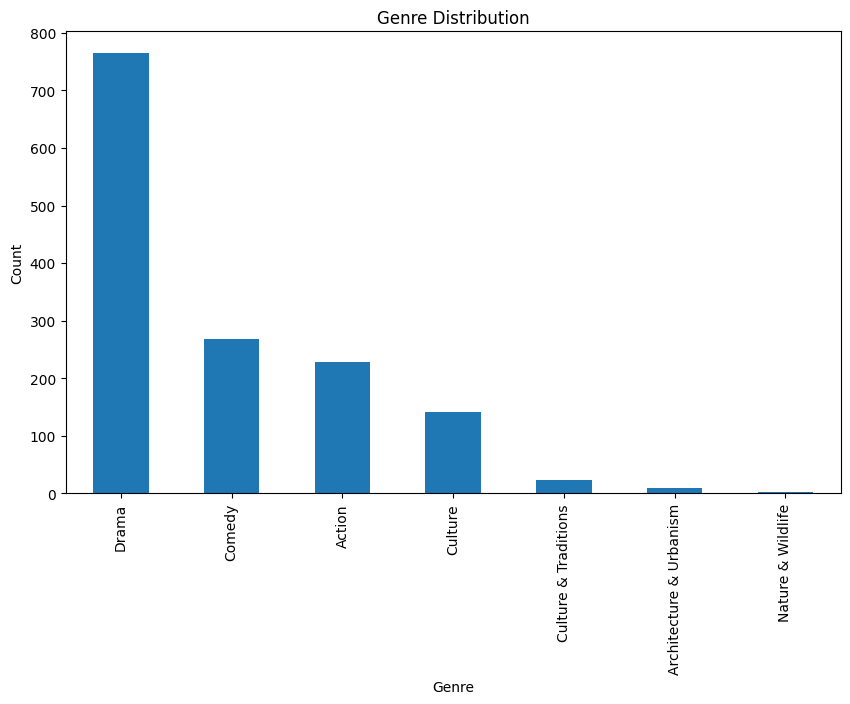

In [ ]:
genre_counts = df['New_Genre'].value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

However, it is crucial to exercise caution when applying resampling methods. While these techniques can help balance the dataset, oversampling should not be excessive, as it may lead to model overfitting due to the model being exposed to repeated instances of the data. If you choose to train your model on an oversampled version of the dataset, ensure that your test dataset remains unaffected by the resampling process. It is recommended to split the data into an 80/20 ratio (train/test) before proceeding with resampling. (seed=42)



In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

class DataResampling:
    def __init__(self, df, target_col):
        self.df = df
        self.target_col = target_col

    def split_data(self, test_size=0.2, random_state=42):
        """
        Split the dataset into training and testing sets.

        Args:
            test_size (float): The proportion of the dataset to include in the test split (default: 0.2).
            random_state (int): The random seed for reproducibility (default: 42).

        Returns:
            tuple: (X_train, X_test, y_train, y_test)
                X_train (pandas.DataFrame): Training features.
                X_test (pandas.DataFrame): Testing features.
                y_train (pandas.Series): Training target.
                y_test (pandas.Series): Testing target.
        """
        X = self.df.drop(columns=[self.target_col])
        y = self.df[self.target_col]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        return X_train, X_test, y_train, y_test

    def resample_data(self, X_train, y_train, random_state=42):
        """
        Apply resampling techniques to balance the training dataset.

        Args:
            X_train (pandas.DataFrame): Training features.
            y_train (pandas.Series): Training target.
            random_state (int): The random seed for reproducibility (default: 42).

        Returns:
            tuple: (X_resampled, y_resampled)
                X_resampled (pandas.DataFrame): Resampled training features.
                y_resampled (pandas.Series): Resampled training target.
        """
        ros = RandomOverSampler(random_state=random_state)
        X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
        return X_resampled, y_resampled

target_col = 'New_Genre'
data_resampling = DataResampling(df, target_col)

X_train, X_test, y_train, y_test = data_resampling.split_data()

X_resampled, y_resampled = data_resampling.resample_data(X_train, y_train)

Additionally, encoding categorical variables is an essential step in feature engineering for machine learning models. Depending on the nature of your categorical features, you may need to apply techniques such as one-hot encoding or label encoding to convert them into a format suitable for model training.

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

class CategoricalEncoder:
    def __init__(self, df, categorical_cols):
        self.df = df
        self.categorical_cols = categorical_cols

    def label_encode(self):
        """
        Apply label encoding to categorical variables.

        Returns:
            pandas.DataFrame: The DataFrame with categorical variables encoded.
        """
        label_encoders = {}
        for col in self.categorical_cols:
            le = LabelEncoder()
            self.df[col] = le.fit_transform(self.df[col])
            label_encoders[col] = le
        return self.df

    def one_hot_encode(self, drop_first=False):
        """
        Apply one-hot encoding to categorical variables.

        Args:
            drop_first (bool): If True, drop the first column of one-hot encoded data to avoid multicollinearity.

        Returns:
            pandas.DataFrame: The DataFrame with categorical variables one-hot encoded.
        """
        return pd.get_dummies(self.df, columns=self.categorical_cols, drop_first=drop_first)

categorical_cols = ['Genre', 'New_Genre']

categorical_encoder = CategoricalEncoder(df, categorical_cols)

df_label_encoded = categorical_encoder.label_encode()

df_one_hot_encoded = categorical_encoder.one_hot_encode(drop_first=True)

# Fine-tuning

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

## Persian

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load pre-trained ParsBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/distilbert-fa-zwnj-base")
model = AutoModelForSequenceClassification.from_pretrained("HooshvareLab/distilbert-fa-zwnj-base", num_labels=10)  # Adjust num_labels based on your dataset
model.to(device)


### Preprocessed

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Preprocessed Persian'], df['New_Genre'], test_size=0.2, random_state=42)

train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=512)

train_dataset = CustomDataset(train_encodings, y_train.tolist())
test_dataset = CustomDataset(test_encodings, y_test.tolist())

In [ ]:
num_epochs = 5
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

trainer.train()


In [ ]:
# Calulate the Accuracy and F1-score for test data

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

predictions = trainer.predict(test_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = y_test.tolist()

accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['New_Genre'].unique(), yticklabels=df['New_Genre'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Not Preprocessed


In [ ]:
# Repeat all the previous steps for the raw persian data
# Don't forget to load the model again

X_train, X_test, y_train, y_test = train_test_split(df['Content_1'], df['New_Genre'], test_size=0.2, random_state=42)

train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=512)

train_dataset = CustomDataset(train_encodings, y_train.tolist())
test_dataset = CustomDataset(test_encodings, y_test.tolist())

model = AutoModelForSequenceClassification.from_pretrained("HooshvareLab/distilbert-fa-zwnj-base", num_labels=10)
model.to(device)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

trainer.train()

predictions = trainer.predict(test_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = y_test.tolist()

accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['New_Genre'].unique(), yticklabels=df['New_Genre'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## English


In [ ]:
# Load pre-trained BERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=10)  # Adjust num_labels based on your dataset
model.to(device)

### Preprocessed

In [ ]:
# Repeat all the needed steps for the preprocessed english data

X_train, X_test, y_train, y_test = train_test_split(df['Preprocessed English'], df['New_Genre'], test_size=0.2, random_state=42)

train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=512)

train_dataset = CustomDataset(train_encodings, y_train.tolist())
test_dataset = CustomDataset(test_encodings, y_test.tolist())

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=10)
model.to(device)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

trainer.train()

predictions = trainer.predict(test_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = y_test.tolist()

accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['New_Genre'].unique(), yticklabels=df['New_Genre'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Not Preprocessed


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
10,2.044200
20,2.003700
30,1.825200
40,1.838900
50,1.898900
60,1.685700
70,1.648800
80,1.475200
90,1.594200
100,1.573400


Accuracy: 0.6423611111111112
F1 Score: 0.6242714714760861


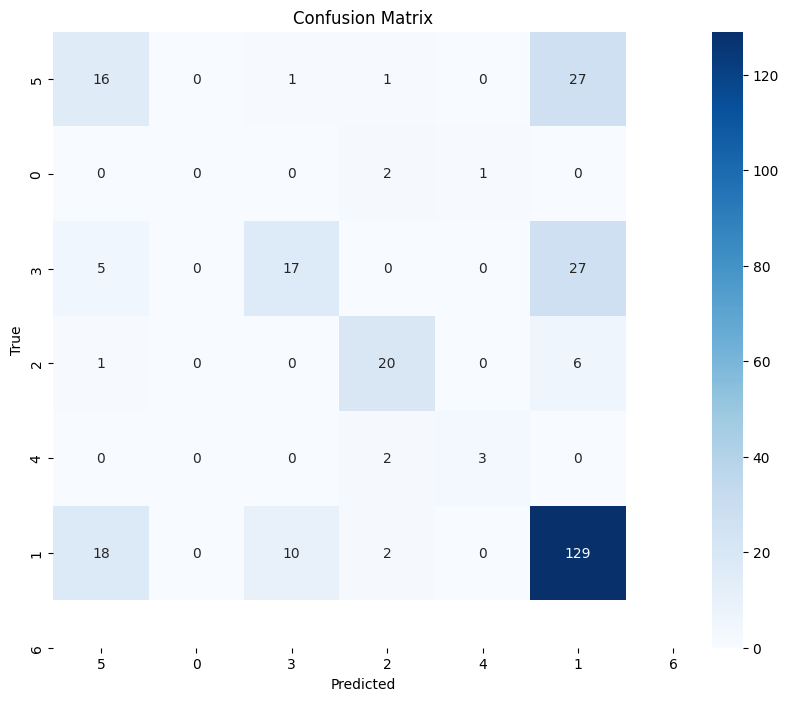

In [ ]:
# Repeat all the previous steps for the raw english data
# Don't forget to load the model again

X_train, X_test, y_train, y_test = train_test_split(df['Content_2'], df['New_Genre'], test_size=0.2, random_state=42)

train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=512)

train_dataset = CustomDataset(train_encodings, y_train.tolist())
test_dataset = CustomDataset(test_encodings, y_test.tolist())

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=10)
model.to(device)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

trainer.train()

predictions = trainer.predict(test_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = y_test.tolist()

accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['New_Genre'].unique(), yticklabels=df['New_Genre'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Results Analysis

Analyze the results of the Fine-tuning section.


با انالیز نتیجه های بدست آمده میتوان دید که اولا در زبان انگلیسی نتیجه بهتری گرفته ایم که میتوان ناشی از پیش پردازش بهتر  در این زبان باشد. همچنین یک نکته ای که متوجه آن شدیم این است که ما در ابتدا سطری را که داده نال داشت را به طور کامل حذف میکردیم و نتیجه چندان خوبی در این بخش نمیگرفتیم. اما با مدریت بهتر دیتاست توانستیم به دقت بهتری برسیم.